# $\text{Exact diagonalization of the } \phi \text{ Hamiltonian} - E \text{ } vs \text{ } E_J$

In [18]:
import numpy as np
from scipy.sparse.linalg import eigsh
import scipy.sparse as sparse
from scipy.linalg import eigh
import scipy.linalg
import matplotlib.pyplot as plt
from qutip import *
import math

In [19]:
#plt.rcParams['figure.figsize']=8.5,5.1
plt.rcParams['font.size']=20
plt.rcParams['lines.linewidth']=1.5
plt.rcParams['text.usetex']=True

In [20]:
Narray=np.arange(11,51,1)
Eig10array=[]
Eig11array=[]
Eig10array2=[]
Eig11array2=[]
# Qubit parameters

phi_ext_value=np.pi

# Qubit parameters 1

E_J_value=1.0
E_Cj=1.0
E_L=1.0
alpha=(1j*(E_Cj/E_L)**(1.0/4.0))

#Qubit parameters 2

E_J_2_value=(1.0/5.0)
E_Cj_2=1.0
E_L_2=(1.0/16)
alpha2=(1j*(E_Cj_2/E_L_2)**(1.0/4.0))



In [21]:
# Construction of the phi Hamiltonian

def Hamiltonian_ONLYPHI_EIG(EJ,ECJ,EL,phi,alph,Nval):
    # For phi
    a_phi=np.diag(np.sqrt(np.arange(1, Nval+1)), 1)
    ad_phi=np.diag(np.sqrt(np.arange(1, Nval+1)), -1)
    N_phi=ad_phi@a_phi
    Id_N=np.eye(Nval+1)
    #Initial
    H=np.zeros((Nval+1,Nval+1))   #,dtype=complex
    H_phi=2*np.sqrt(ECJ*EL)*(N_phi+0.5*Id_N)
    #Interaction Hamiltonian construction
    #cos_phi=(0.5*((displace(N+1,alph)*(math.e**(-1j*phi/2)))+(displace(N+1,-alph)*(math.e**(1j*phi/2)))))*np.diag(np.ones(N+1),0)
    cos_phi=0.5*(scipy.linalg.expm(alph*(a_phi+ad_phi)-(Id_N*1j*phi/2))+scipy.linalg.expm(-alph*(a_phi+ad_phi)+(Id_N*1j*phi/2)))
    H_I=2*EJ*cos_phi.real #HE QUITADO EL DOOOOOOOOOSSSSSS
    #H_I=np.zeros(((N+1),(N+1)))
    #Total Hamiltonian
    H+=H_phi-H_I  #.astype(complex)
    return H

## $\text{1. Plot for }$ $E_{Cs} = E_{CJ} = E_L = 1$, $n_g = \frac{1}{2}$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = i$.

In [22]:
#EIGENVALUE STUDY

for neig in Narray:
    print("Step for N = ",neig)
    Hstudy=Hamiltonian_ONLYPHI_EIG(E_J_value,E_Cj,E_L,phi_ext_value,alpha,neig)
    print(Hstudy)
    print("Hamiltonian built, len(H)=",len(Hstudy)**2)
    valsPHI, _ = eigsh(Hstudy, k=12, which='SA')
    print("Eigenvalues calculated")
    print("10th and 11th degenerated vals are",valsPHI[9], valsPHI[10])
    Eig10array.append(valsPHI[9])
    Eig11array.append(valsPHI[10])
    

Step for N =  11
[[ 1.00000000e+00 -1.21306132e+00  5.09180250e-17  4.95230210e-01
  -5.09062088e-17 -1.10736842e-01  2.71432354e-17  1.70870910e-02
  -3.12105504e-18 -2.01450825e-03  5.72191647e-19  2.06971548e-04]
 [-1.21306132e+00  3.00000000e+00 -8.57763885e-01  2.08305235e-16
   7.42845314e-01 -8.27592504e-17 -2.26040565e-01  4.67737199e-17
   4.22860670e-02 -4.40183185e-18 -5.68398746e-03  1.45795714e-18]
 [ 1.40710118e-16 -8.57763885e-01  5.00000000e+00 -3.50180641e-01
   1.59252895e-17  8.61330599e-01 -2.93678159e-16 -3.50393438e-01
   1.70797372e-17  7.84169844e-02 -1.09336770e-17 -1.34764832e-02]
 [ 4.95230210e-01 -4.06864642e-17 -3.50180641e-01  7.00000000e+00
   1.01088588e-01  2.18338277e-16  8.67431945e-01 -2.10642778e-16
  -4.70894317e-01  2.11872342e-17  1.22004626e-01 -3.87665796e-17]
 [-2.14519632e-17  7.42845314e-01 -2.47575800e-16  1.01088588e-01
   9.00000000e+00  4.29469124e-01 -8.79570998e-17  7.85009093e-01
   9.25048041e-17 -5.81346324e-01  1.10203086e-16  2.13

In [23]:
for neig2 in Narray:
    print("Step for N = ",neig2)
    Hstudy2=Hamiltonian_ONLYPHI_EIG(E_J_2_value,E_Cj_2,E_L_2,phi_ext_value,alpha2,neig2)
    print(Hstudy2)
    print("Hamiltonian built, len(H)=",len(Hstudy2)**2)
    vals2PHI, _ = eigsh(Hstudy2, k=12, which='SA')
    print("Eigenvalues calculated")
    print("10th and 11th degenerated vals are",vals2PHI[9], vals2PHI[10])
    Eig10array2.append(vals2PHI[9])
    Eig11array2.append(vals2PHI[10])

Step for N =  11
[[ 2.50000000e-01 -1.08268248e-01 -3.26799617e-17  1.76802214e-01
   1.70310151e-17 -1.58154106e-01  1.22395410e-17  9.78012396e-02
  -2.24091495e-18 -4.73223837e-02 -1.52788818e-18  2.31947247e-02]
 [-1.08268248e-01  7.50000000e-01  1.53115992e-01 -2.88294417e-17
  -3.89058616e-05  6.93188407e-17 -1.28639104e-01 -2.97232944e-17
   1.34656528e-01  1.40442981e-17 -7.27183178e-02  1.41521209e-17]
 [ 6.50041491e-17  1.53115992e-01  1.25000000e+00  6.24549601e-02
  -4.37641059e-17 -1.11039138e-01  3.82445947e-17 -4.05045908e-02
  -3.37509934e-17  1.56508508e-01  2.90320107e-17 -1.86940719e-01]
 [ 1.76802214e-01 -1.93955169e-17  6.24549601e-02  1.75000000e+00
  -7.12023683e-02  5.11429531e-17 -1.13871451e-01  9.52367816e-19
   9.49903736e-02  1.48221619e-17 -1.28458316e-02 -5.03378182e-17]
 [-6.35847205e-17 -3.89058616e-05 -1.76124085e-17 -7.12023683e-02
   2.25000000e+00 -1.22907429e-01  2.20462618e-17  1.87769089e-02
   4.49281637e-17 -1.33658267e-02  2.17211966e-18  1.40

In [24]:
Nmax=3000
Hmax=Hamiltonian_ONLYPHI_EIG(E_J_value,E_Cj,E_L,phi_ext_value,alpha,Nmax)
Hmax2=Hamiltonian_ONLYPHI_EIG(E_J_2_value,E_Cj_2,E_L_2,phi_ext_value,alpha2,Nmax)
print("Hamiltonian built, len(H)=",len(Hmax)**2)
print("Hamiltonian built, len(H)=",len(Hmax2)**2)
valsPHImax, _ = eigsh(Hmax, k=12, which='SA')
valsPHImax2, _ = eigsh(Hmax2, k=12, which='SA')
print("Eigenvalues calculated")
print("10th and 11th degenerated vals are",valsPHImax[9], valsPHImax[10])
print("10th and 11th degenerated vals are",valsPHImax2[9], valsPHImax2[10])
Deltaeig10array=valsPHImax[9]-Eig10array
print(Deltaeig10array)
Deltaeig11array=valsPHImax[10]-Eig11array
print(Deltaeig11array)
Deltaeig10array2=valsPHImax2[9]-Eig10array2
print(Deltaeig10array2)
Deltaeig11array2=valsPHImax2[10]-Eig11array2
print(Deltaeig11array2)

Hamiltonian built, len(H)= 9006001
Hamiltonian built, len(H)= 9006001
Eigenvalues calculated
10th and 11th degenerated vals are 19.068546968545203 21.030789040790914
10th and 11th degenerated vals are 4.763868584175697 5.2614684205540865
[ 5.36561676e-01 -1.41322602e-01  5.59301968e-02  4.68649204e-02
 -1.98704597e-02  1.00213343e-02 -3.94117884e-03  3.59531045e-03
 -2.17155182e-03  1.19645109e-03 -3.34793426e-04  5.62590193e-05
  4.89204389e-05 -3.56529636e-05  2.31216374e-05 -1.13906890e-05
  6.84177911e-06 -3.97148041e-06  2.39030572e-06 -1.20246274e-06
  5.58953030e-07 -1.85378074e-07  4.73317208e-08  7.83264298e-09
 -1.36248097e-08  1.20585248e-08 -7.28995175e-09  4.53998084e-09
 -2.61629651e-09  1.57404756e-09 -8.89077256e-10  4.94171815e-10
 -2.45997001e-10  1.15701226e-10 -4.52509141e-11  1.49498192e-11
 -2.45137244e-12 -1.64845915e-12  1.80833126e-12 -1.92557081e-12]
[-4.90913470e-01  3.90259461e-01 -9.91848656e-02  8.44830513e-02
  5.29273216e-02 -3.17315700e-02  1.65917471e-

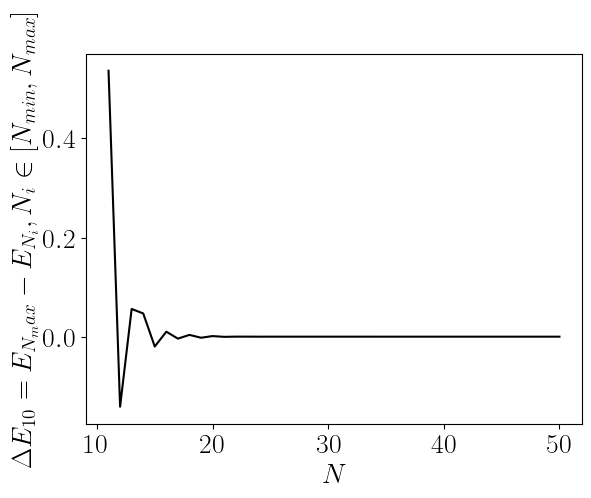

In [25]:
plt.plot(Narray,Deltaeig10array,c="k")
#plt.ylim(-0.0001,0.0001)
#plt.xlim(27.5,31)
plt.xlabel('$N$')
plt.ylabel('$ \Delta E_{10} = E_{N_max} - E_{N_i}, N_i \in [N_{min},N_{max}] $')
#plt.savefig('ONLYPHI_Eig10study_Nmin11_Nmax3000_2.pdf')
plt.show()

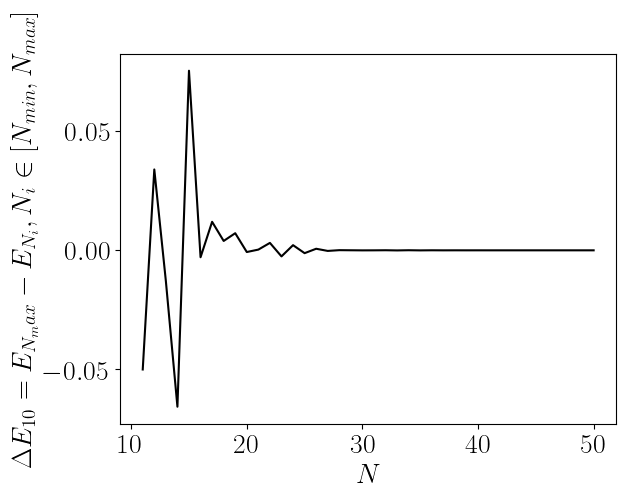

In [26]:
plt.plot(Narray,Deltaeig10array2,c="k")
#plt.ylim(-0.0001,0.0001)
#plt.xlim(27.5,31)
plt.xlabel('$N$')
plt.ylabel('$ \Delta E_{10} = E_{N_max} - E_{N_i}, N_i \in [N_{min},N_{max}] $')
#plt.savefig('ONLYPHI_Eig10study_Nmin11_Nmax3000_2.pdf')
plt.show()

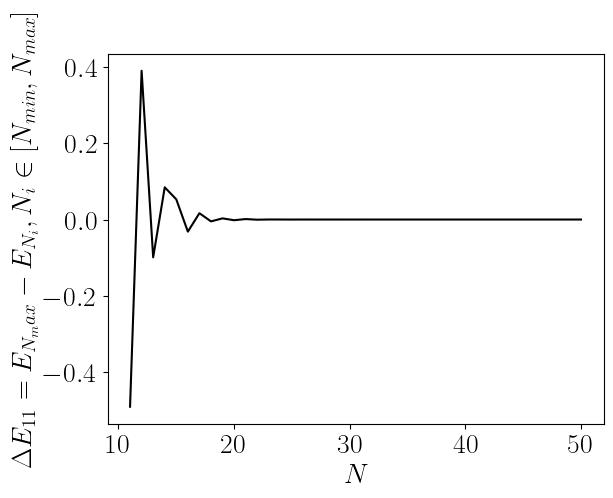

In [27]:

plt.plot(Narray,Deltaeig11array,c="k")
#plt.ylim(-0.0000001,0.0000001)
#plt.xlim(20,50)
plt.xlabel('$N$')
plt.ylabel('$ \Delta E_{11} = E_{N_max} - E_{N_i}, N_i \in [N_{min},N_{max}] $')
#plt.savefig('ONLYPHI_Eig11study_Nmin11_Nmax3000_2.pdf')
plt.show()

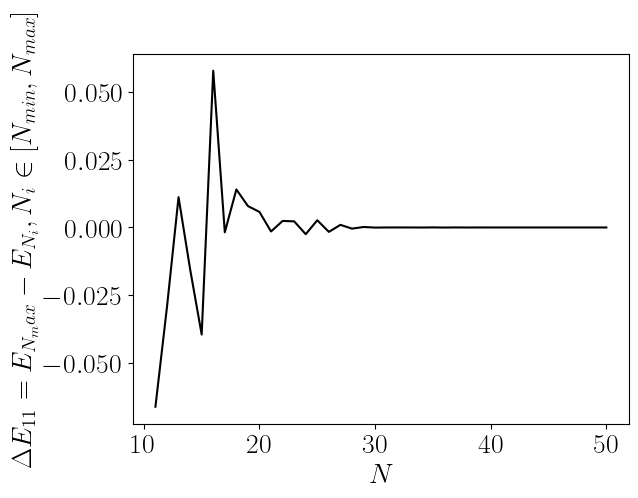

In [28]:
plt.plot(Narray,Deltaeig11array2,c="k")
#plt.ylim(-0.0000001,0.0000001)
#plt.xlim(20,50)
plt.xlabel('$N$')
plt.ylabel('$ \Delta E_{11} = E_{N_max} - E_{N_i}, N_i \in [N_{min},N_{max}] $')
#plt.savefig('ONLYPHI_Eig11study_Nmin11_Nmax3000_2.pdf')
plt.show()

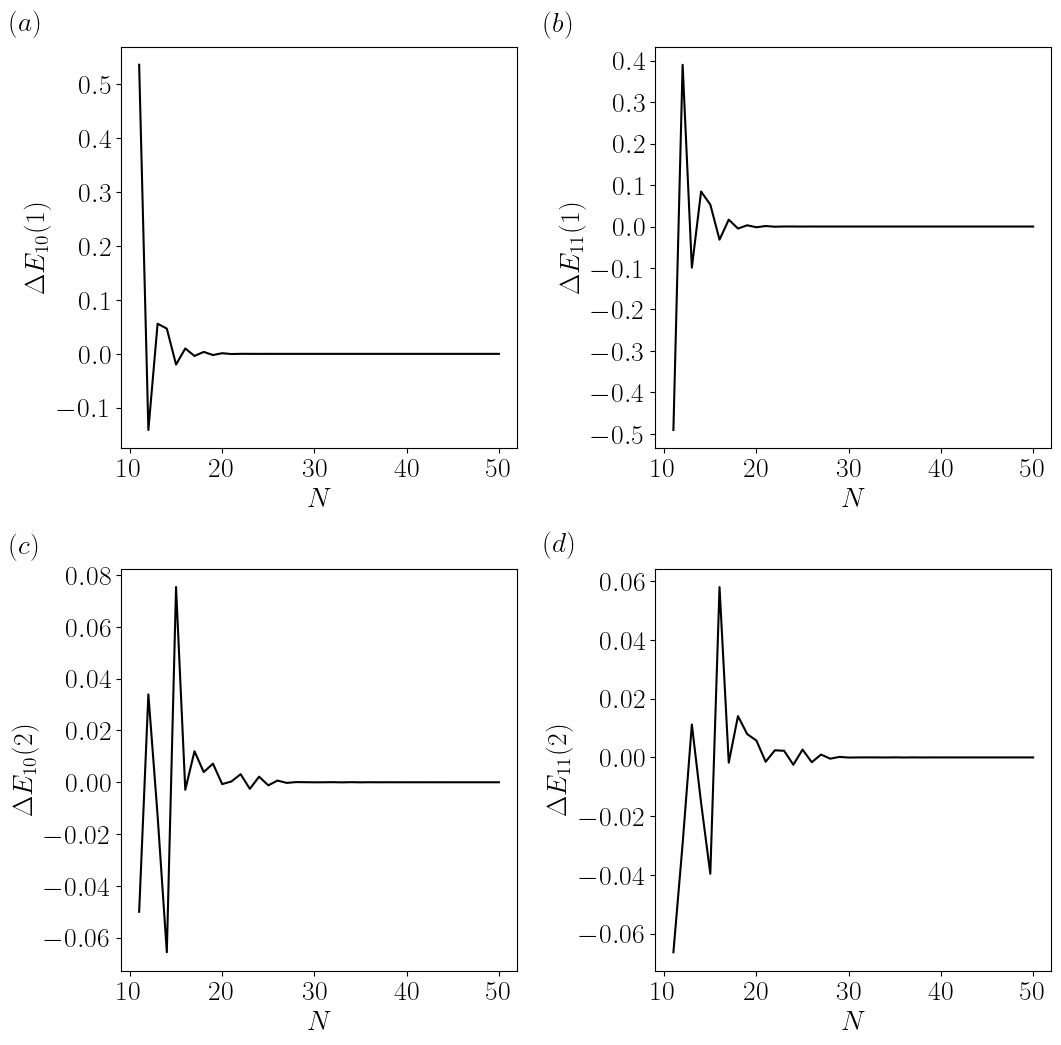

In [67]:
import matplotlib.ticker as ticker

# Create the figure and subplots
fig = plt.figure(figsize=(12, 12))

# Plot 1: subplot in position (1, 1)
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(Narray, Deltaeig10array, c="k")
ax1.set_xlabel('$N$')
ax1.set_ylabel(r'$ \Delta E_{10} (1)$')#= E_{N_{\max}} - E_{N_i}, N_i \in [N_{\min},N_{\max}] 
ax1.text(-3,0.6,r'$(a)$', fontsize=20)
ax1.set_xticks([10,20,30,40,50])
ax1.set_xticklabels([r"$10$",r"$20$",r"$30$",r"$40$",r"$50$"])
ax1.set_yticks([-0.1,0.0,0.1,0.2,0.3,0.4,0.5])
ax1.set_yticklabels([r"$-0.1$",r"$0.0$",r"$0.1$",r"$0.2$",r"$0.3$",r"$0.4$",r"$0.5$"])

# Plot 2: subplot in position (1, 2)
ax2 = fig.add_subplot(2, 2, 2)
ax2.plot(Narray, Deltaeig11array, c="k")
ax2.set_xlabel('$N$')
ax2.set_ylabel(r'$ \Delta E_{11} (1)$')#= E_{N_{\max}} - E_{N_i}, N_i \in [N_{\min},N_{\max}] 
ax2.text(-3,0.47,r'$(b)$', fontsize=20)
ax2.set_xticks([10,20,30,40,50])
ax2.set_xticklabels([r"$10$",r"$20$",r"$30$",r"$40$",r"$50$"])
ax2.set_yticks([-0.5,-0.4,-0.3,-0.2,-0.1,0.0,0.1,0.2,0.3,0.4])
ax2.set_yticklabels([r"$-0.5$",r"$-0.4$",r"$-0.3$",r"$-0.2$",r"$-0.1$",r"$0.0$",r"$0.1$",r"$0.2$",r"$0.3$",r"$0.4$"])

# Plot 3: subplot in position (2, 1)
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(Narray, Deltaeig10array2, c="k")
ax3.set_xlabel('$N$')
ax3.set_ylabel(r'$ \Delta E_{10} (2)$')#= E_{N_{\max}} - E_{N_i}, N_i \in [N_{\min},N_{\max}] 
ax3.text(-3,0.088,r'$(c)$', fontsize=20)
ax3.yaxis.set_major_formatter(ticker.FormatStrFormatter(r'$%.2f$'))
ax3.set_xticks([10,20,30,40,50])
ax3.set_xticklabels([r"$10$",r"$20$",r"$30$",r"$40$",r"$50$"])
ax3.set_yticks([-0.06,-0.04,-0.02,0,0.02,0.04,0.06,0.08])
ax3.set_yticklabels([r"$-0.06$",r"$-0.04$",r"$-0.02$",r"$0.00$",r"$0.02$",r"$0.04$",r"$0.06$",r"$0.08$"])

# Plot 4: subplot in position (2, 2)
ax4 = fig.add_subplot(2, 2, 4)
ax4.plot(Narray, Deltaeig11array2, c="k")
ax4.set_xlabel('$N$')
ax4.set_ylabel(r'$ \Delta E_{11} (2)$') #= E_{N_{\max}} - E_{N_i}, N_i \in [N_{\min},N_{\max}] 
ax4.text(-3,0.07,r'$(d)$', fontsize=20)
ax4.set_xticks([10,20,30,40,50])
ax4.set_xticklabels([r"$10$",r"$20$",r"$30$",r"$40$",r"$50$"])

# Adjust the spacing between subplots
#fig.tight_layout()
fig.subplots_adjust(wspace=0.35,hspace=0.3)

# Show the figure
#plt.savefig('PHI_EIGSTUDY.png',dpi=300,bbox_inches='tight')
plt.show()


## $\text{2. Plot for }$ $E_{Cs} = \frac{1}{20}$, $E_{CJ} = 1$, $E_L = \frac{1}{16}$, $n_g = \frac{1}{2}$, $\alpha = i \left(\frac{E_{CJ}}{E_L}\right)^{1/4} = 2i$.